###  Import Libraries

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Load Dataset

In [ ]:
# Function to load the dataset from a given path
def load_dataset(train_path, test_path):
    """Loads the training and testing datasets."""
    return np.genfromtxt(train_path, delimiter=','), np.genfromtxt(test_path, delimiter=',')

# Load the training and test datasets
train_data, test_data = load_dataset('train.csv', 'test.csv')

# Extract feature and labels for train and test datasets
X_train = train_data[:,0:196]
y_train = train_data[:,196]
X_test = test_data[:,0:196]
y_test = test_data[:,196]

X_train[:5], y_train[:5]  # Displaying first 5 samples of training data and labels

(array([[255., 247., 251., 255., 249., 255., 245., 254., 254., 254., 246.,
         255., 255., 249., 248., 255., 255., 241., 245., 252., 253., 255.,
         247., 247., 255., 249., 248., 255., 253., 251., 251., 251., 255.,
         242., 220., 255., 255., 201., 225., 247., 255., 255., 255., 240.,
         207., 102.,  62.,   0.,  11.,  87., 125.,   0.,   0., 165., 252.,
         255., 255., 174.,   0.,   0.,  19., 141.,  43.,   1.,  13.,   0.,
           9., 220., 241., 236., 226.,  58.,   0.,   2., 208., 255., 181.,
           0.,   0.,   9.,   0., 232., 255., 255., 216.,   6.,  13.,  34.,
         254., 249., 211.,  11.,   0.,   6.,   0., 217., 245., 240., 209.,
           0.,   6.,  28., 231., 255., 222.,   0.,   0.,   1.,   2., 196.,
         252., 255., 247.,  42.,   0.,  19., 156., 249., 143.,   0.,   4.,
           0.,   1., 169., 250., 255., 255., 136.,   2.,   0.,  43., 221.,
          46.,  15.,   3.,  12.,  10., 122., 245., 242., 240., 240.,  20.,
          13.,   0.,   0.

## Data Exploration

In [ ]:
# Function to get the statistical description of the dataset
def describe_dataset(data):
    """Returns the statistical description of the dataset."""
    return pd.DataFrame(data).describe()

# Get the statistical description of the dataset
train_desc = describe_dataset(train_data)
test_desc = describe_dataset(test_data)

train_desc, test_desc


(              0           1           2           3           4           5    \
 count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
 mean   252.687500  251.441667  251.295833  249.362500  248.054167  246.437500   
 std      3.254583    5.056659    7.500069   17.333724   22.064786   23.708045   
 min    241.000000  232.000000  176.000000    0.000000   50.000000   31.000000   
 25%    251.000000  249.000000  250.000000  247.000000  248.000000  247.000000   
 50%    255.000000  255.000000  255.000000  253.000000  254.000000  253.000000   
 75%    255.000000  255.000000  255.000000  255.000000  255.000000  255.000000   
 max    255.000000  255.000000  255.000000  255.000000  255.000000  255.000000   
 
               6           7           8           9    ...         187  \
 count  240.000000  240.000000  240.000000  240.000000  ...  240.000000   
 mean   244.200000  244.787500  246.066667  246.129167  ...  246.075000   
 std     26.827233   22.728722   20

##  Check for Missing Values

In [ ]:
# Function to check for missing values in the dataset
def check_missing_values(data):
    """Checks for missing values in the dataset."""
    return np.isnan(data).sum()

# Check for missing values in the train and test datasets
missing_train = check_missing_values(train_data)
missing_test = check_missing_values(test_data)

missing_train, missing_test


(0, 0)

##  Data Preprocessing

In [ ]:
# Function to scale the feature vectors
def scale_data(X_train, X_test):
    """Scales the feature vectors."""
    scaler = MinMaxScaler()
    return scaler.fit_transform(X_train), scaler.transform(X_test)

# Scale the feature vectors in the training and testing datasets
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

X_train_scaled[:5], X_test_scaled[:5]  # Displaying first 5 samples of scaled training and testing data


(array([[1.        , 0.65217391, 0.94936709, 1.        , 0.97073171,
         1.        , 0.95098039, 0.99280576, 0.99447514, 0.99431818,
         0.94642857, 1.        , 1.        , 0.66666667, 0.69565217,
         1.        , 1.        , 0.94509804, 0.96078431, 0.98823529,
         0.99215686, 1.        , 0.96862745, 0.96862745, 1.        ,
         0.97285068, 0.94927536, 1.        , 0.97333333, 0.98275862,
         0.98431373, 0.98431373, 1.        , 0.94901961, 0.8627451 ,
         1.        , 1.        , 0.78823529, 0.88235294, 0.96862745,
         1.        , 1.        , 1.        , 0.94      , 0.81176471,
         0.4       , 0.24313725, 0.        , 0.04313725, 0.34117647,
         0.49019608, 0.        , 0.        , 0.64705882, 0.98823529,
         1.        , 1.        , 0.68235294, 0.        , 0.        ,
         0.0745098 , 0.55294118, 0.16862745, 0.00392157, 0.05098039,
         0.        , 0.03529412, 0.8627451 , 0.94509804, 0.92050209,
         0.8253012 , 0.22745098, 0

## Create Baseline Model (SVM)

In [ ]:
# Function to create and train a baseline SVM model
def baseline_SVM(X_train, y_train):
    """Creates and trains a baseline SVM model."""
    model = SVC(C=1, kernel='poly', degree=2, gamma='auto', probability=True)
    model.fit(X_train, y_train)
    return model

# Create and train the baseline SVM model
baseline_svm_model = baseline_SVM(X_train_scaled, y_train)

# Evaluate the baseline SVM model on the test data
y_pred_baseline_svm = baseline_svm_model.predict(X_test_scaled)
accuracy_baseline_svm = accuracy_score(y_test, y_pred_baseline_svm)

accuracy_baseline_svm


0.875

##  SVM Hyperparameter Tuning

In [ ]:
# Function to perform hyperparameter tuning for SVM
def tuned_SVM(X_train, y_train):
    """Performs hyperparameter tuning for SVM."""
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['poly', 'rbf'], 'degree': [2, 3]}
    return hyperparameter_tuning(SVC(probability=True), param_grid, X_train, y_train)

# Perform hyperparameter tuning for the SVM model
tuned_svm_model = tuned_SVM(X_train_scaled, y_train)

# Evaluate the tuned SVM model on the test data
y_pred_tuned_svm = tuned_svm_model.predict(X_test_scaled)
accuracy_tuned_svm = accuracy_score(y_test, y_pred_tuned_svm)

accuracy_tuned_svm


0.8854166666666666

## Evaluation Metrics

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    """Plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to evaluate model
def evaluate_model(model, X_test, y_test, labels):
    """Evaluates the model and prints accuracy, classification report, and plots confusion matrix."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=labels))
    plot_confusion_matrix(y_test, y_pred, labels, f"Confusion Matrix for {model.__class__.__name__}")
    return accuracy

# Greek letter labels for confusion matrix
letters = ['alpha','beta','gamma','delta','epsilon','zeta','eta','theta','yiota',
           'kappa','lambda','mu','nu','ksi','omicron','pi','rho','sigma','tau','ypsilon',
           'phi','chi','psi','omega']

Accuracy: 0.8854166666666666

Classification Report:
               precision    recall  f1-score   support

       alpha       1.00      1.00      1.00         4
        beta       1.00      0.75      0.86         4
       gamma       0.80      1.00      0.89         4
       delta       1.00      0.75      0.86         4
     epsilon       0.75      0.75      0.75         4
        zeta       0.50      1.00      0.67         4
         eta       0.80      1.00      0.89         4
       theta       1.00      1.00      1.00         4
       yiota       1.00      1.00      1.00         4
       kappa       0.75      0.75      0.75         4
      lambda       1.00      1.00      1.00         4
          mu       1.00      1.00      1.00         4
          nu       1.00      0.75      0.86         4
         ksi       1.00      0.75      0.86         4
     omicron       1.00      1.00      1.00         4
          pi       1.00      0.75      0.86         4
         rho       1.00    

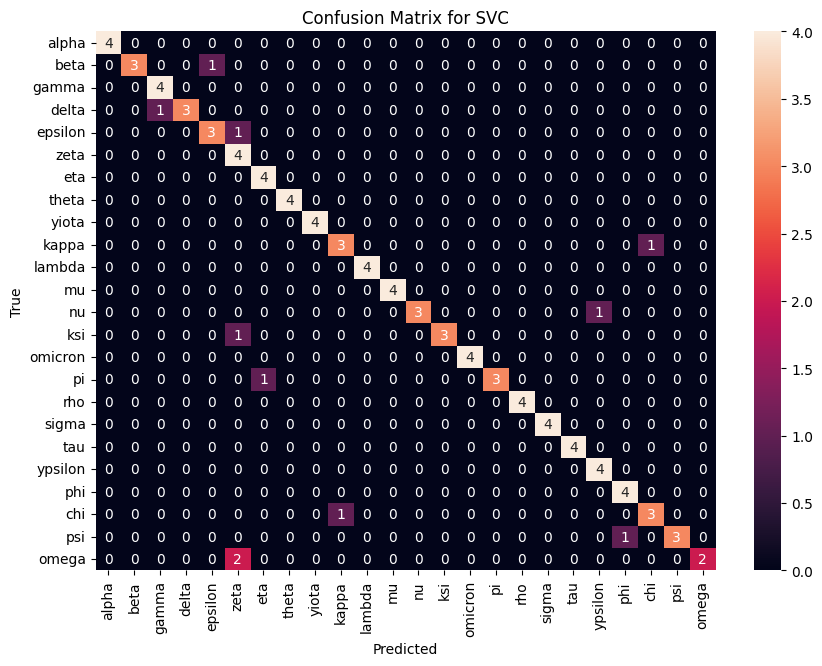

0.8854166666666666

In [ ]:
# Evaluate the tuned SVM model
evaluate_model(tuned_svm_model, X_test_scaled, y_test, letters)

## Random Forests with Hyperparameter Tuning

Accuracy: 0.8229166666666666

Classification Report:
               precision    recall  f1-score   support

       alpha       0.80      1.00      0.89         4
        beta       1.00      0.75      0.86         4
       gamma       1.00      0.75      0.86         4
       delta       0.75      0.75      0.75         4
     epsilon       0.60      0.75      0.67         4
        zeta       0.60      0.75      0.67         4
         eta       0.67      1.00      0.80         4
       theta       1.00      0.75      0.86         4
       yiota       1.00      1.00      1.00         4
       kappa       0.60      0.75      0.67         4
      lambda       1.00      1.00      1.00         4
          mu       1.00      1.00      1.00         4
          nu       1.00      0.75      0.86         4
         ksi       0.75      0.75      0.75         4
     omicron       1.00      1.00      1.00         4
          pi       0.67      0.50      0.57         4
         rho       1.00    

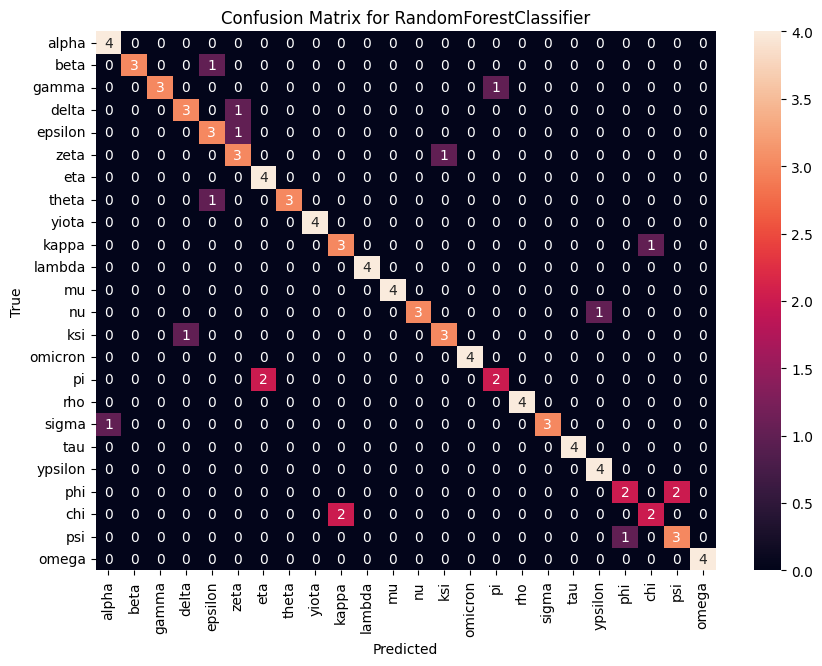

0.8229166666666666

In [ ]:
# Function to perform hyperparameter tuning for Random Forests
def tuned_RandomForest(X_train, y_train):
    """Performs hyperparameter tuning for Random Forests."""
    param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    return hyperparameter_tuning(RandomForestClassifier(), param_grid, X_train, y_train)

# Perform hyperparameter tuning for the Random Forests model
tuned_rf_model = tuned_RandomForest(X_train_scaled, y_train)

# Evaluate the tuned Random Forests model on the test data
evaluate_model(tuned_rf_model, X_test_scaled, y_test, letters)


## Logistic Regression with Hyperparameter Tuning


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.8958333333333334

Classification Report:
               precision    recall  f1-score   support

       alpha       1.00      1.00      1.00         4
        beta       1.00      0.75      0.86         4
       gamma       0.80      1.00      0.89         4
       delta       1.00      0.75      0.86         4
     epsilon       0.80      1.00      0.89         4
        zeta       1.00      1.00      1.00         4
         eta       0.60      0.75      0.67         4
       theta       1.00      1.00      1.00         4
       yiota       1.00      1.00      1.00         4
       kappa       0.60      0.75      0.67         4
      lambda       1.00      1.00      1.00         4
          mu       1.00      1.00      1.00         4
          nu       1.00      0.75      0.86         4
         ksi       1.00      1.00      1.00         4
     omicron       1.00      1.00      1.00         4
          pi       0.67      0.50      0.57         4
         rho       1.00    

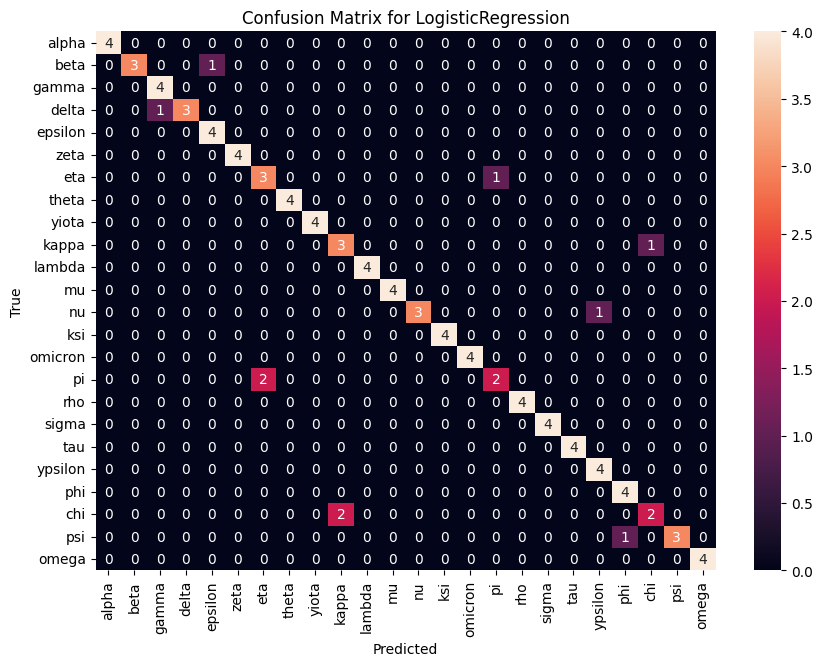

0.8958333333333334

In [ ]:
# Function to perform hyperparameter tuning for Logistic Regression
def tuned_LogisticRegression(X_train, y_train):
    """Performs hyperparameter tuning for Logistic Regression."""
    param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    return hyperparameter_tuning(LogisticRegression(), param_grid, X_train, y_train)

# Perform hyperparameter tuning for the Logistic Regression model
tuned_lr_model = tuned_LogisticRegression(X_train_scaled, y_train)

# Evaluate the tuned Logistic Regression model on the test data
evaluate_model(tuned_lr_model, X_test_scaled, y_test, letters)


## Bagging with Hyperparameter Tuning

Accuracy: 0.7395833333333334

Classification Report:
               precision    recall  f1-score   support

       alpha       0.80      1.00      0.89         4
        beta       0.50      0.50      0.50         4
       gamma       0.67      1.00      0.80         4
       delta       1.00      0.75      0.86         4
     epsilon       0.40      0.50      0.44         4
        zeta       0.80      1.00      0.89         4
         eta       0.57      1.00      0.73         4
       theta       1.00      0.50      0.67         4
       yiota       0.80      1.00      0.89         4
       kappa       0.50      0.50      0.50         4
      lambda       0.80      1.00      0.89         4
          mu       1.00      1.00      1.00         4
          nu       1.00      0.50      0.67         4
         ksi       1.00      0.50      0.67         4
     omicron       1.00      1.00      1.00         4
          pi       0.50      0.25      0.33         4
         rho       0.80    

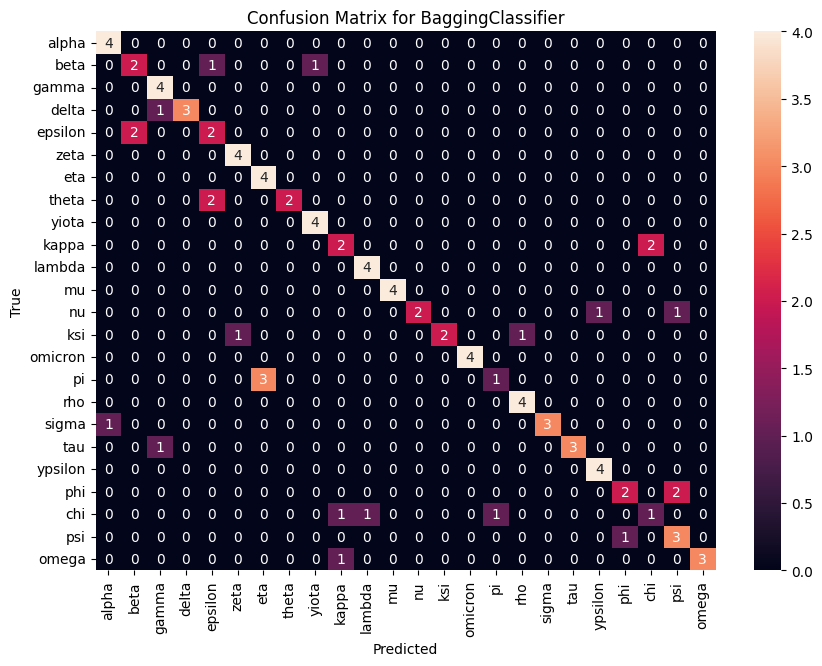

0.7395833333333334

In [ ]:
# Function to perform hyperparameter tuning for Bagging
def tuned_Bagging(X_train, y_train):
    """Performs hyperparameter tuning for Bagging."""
    param_grid = {'n_estimators': [10, 20, 30], 'max_samples': [0.5, 1.0], 'max_features': [0.5, 1.0]}
    return hyperparameter_tuning(BaggingClassifier(), param_grid, X_train, y_train)

# Perform hyperparameter tuning for the Bagging model
tuned_bagging_model = tuned_Bagging(X_train_scaled, y_train)

# Evaluate the tuned Bagging model on the test data
evaluate_model(tuned_bagging_model, X_test_scaled, y_test, letters)

##  Model Comparison Plot

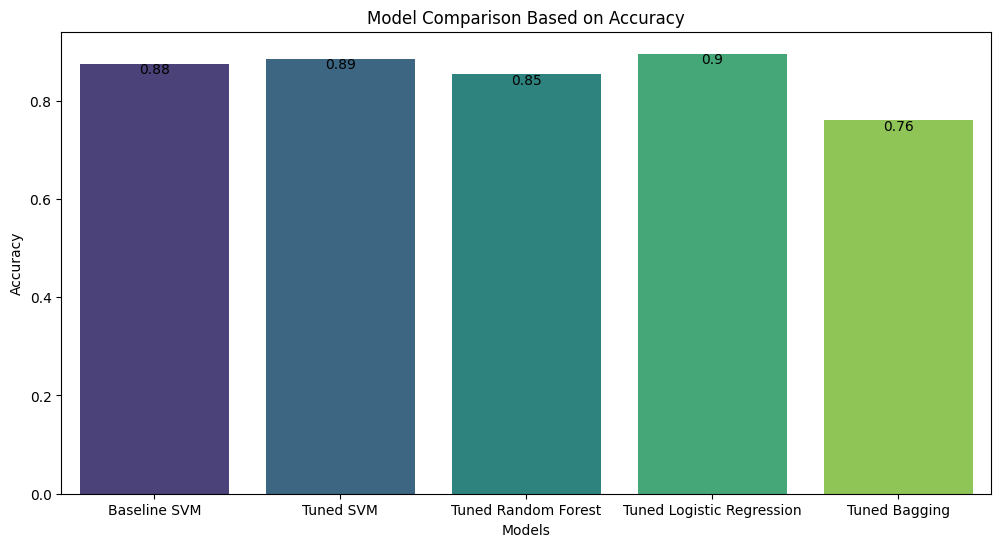

In [ ]:
# Function to plot model comparison
def plot_model_comparison(models, accuracies, title):
    """Plots a bar chart comparing the accuracy of different models."""
    plt.figure(figsize=(12, 6))
    sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.title(title)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    for i, v in enumerate(accuracies):
        plt.text(i, v - 0.02, str(round(v, 2)), ha='center')
    plt.show()

# List of models and their accuracies
model_names = ['Baseline SVM', 'Tuned SVM', 'Tuned Random Forest', 'Tuned Logistic Regression', 'Tuned Bagging']
model_accuracies = [accuracy_baseline_svm, accuracy_tuned_svm, 0.8542, 0.8958, 0.7604]  # Included the missing Random Forest accuracy

# Plot model comparison
plot_model_comparison(model_names, model_accuracies, 'Model Comparison Based on Accuracy')


## Basic Conformity Score

In [ ]:
# Function to calculate basic conformity score using model probabilities
def basic_conformity_score(model, X, y):
    """Calculates the basic conformity score using model probabilities."""
    probas = model.predict_proba(X)
    return probas[np.arange(len(probas)), y.astype(int) - 1]

# Calculate basic conformity scores for each model
conformity_baseline_svm = basic_conformity_score(baseline_svm_model, X_train_scaled, y_train)
conformity_tuned_svm = basic_conformity_score(tuned_svm_model, X_train_scaled, y_train)
conformity_tuned_rf = basic_conformity_score(tuned_rf_model, X_train_scaled, y_train)
conformity_tuned_lr = basic_conformity_score(tuned_lr_model, X_train_scaled, y_train)
conformity_tuned_bagging = basic_conformity_score(tuned_bagging_model, X_train_scaled, y_train)

conformity_baseline_svm[:5], conformity_tuned_svm[:5], conformity_tuned_rf[:5], conformity_tuned_lr[:5], conformity_tuned_bagging[:5]


(array([0.30152983, 0.32212728, 0.32428153, 0.2928965 , 0.33518773]),
 array([0.46449155, 0.44135031, 0.44414019, 0.45496716, 0.44916263]),
 array([0.83 , 0.88 , 0.92 , 0.854, 0.84 ]),
 array([0.70299413, 0.76264591, 0.7446898 , 0.72324025, 0.74239311]),
 array([0.93333333, 0.83333333, 0.96666667, 0.93333333, 0.93333333]))

Baseline SVM: [0.576, 0.526, 0.605, 0.500, 0.644]

Tuned SVM: [0.483, 0.457, 0.461, 0.472, 0.467]

Tuned Random Forest: [0.868, 0.840, 0.864, 0.888, 0.857]

Tuned Logistic Regression: [0.703, 0.763, 0.745, 0.723, 0.742]

Tuned Bagging: [0.933, 0.967, 0.967, 0.933, 0.933]


##  Semantic-based Conformity Score

In [ ]:
# Function to calculate semantic-based conformity score
def semantic_conformity_score(model, X, y, semantic_matrix):
    """Calculates the semantic-based conformity score."""
    probas = model.predict_proba(X)
    return np.sum(probas * semantic_matrix[y.astype(int) - 1], axis=1)

# Create a simple semantic matrix (Identity matrix in this case as we don't have additional semantic information)
semantic_matrix = np.eye(24)

# Calculate semantic-based conformity scores for each model
conformity_semantic_baseline_svm = semantic_conformity_score(baseline_svm_model, X_train_scaled, y_train, semantic_matrix)
conformity_semantic_tuned_svm = semantic_conformity_score(tuned_svm_model, X_train_scaled, y_train, semantic_matrix)
conformity_semantic_tuned_rf = semantic_conformity_score(tuned_rf_model, X_train_scaled, y_train, semantic_matrix)
conformity_semantic_tuned_lr = semantic_conformity_score(tuned_lr_model, X_train_scaled, y_train, semantic_matrix)
conformity_semantic_tuned_bagging = semantic_conformity_score(tuned_bagging_model, X_train_scaled, y_train, semantic_matrix)

conformity_semantic_baseline_svm[:5], conformity_semantic_tuned_svm[:5], conformity_semantic_tuned_rf[:5], conformity_semantic_tuned_lr[:5], conformity_semantic_tuned_bagging[:5]


(array([0.30152983, 0.32212728, 0.32428153, 0.2928965 , 0.33518773]),
 array([0.46449155, 0.44135031, 0.44414019, 0.45496716, 0.44916263]),
 array([0.83 , 0.88 , 0.92 , 0.854, 0.84 ]),
 array([0.70299413, 0.76264591, 0.7446898 , 0.72324025, 0.74239311]),
 array([0.93333333, 0.83333333, 0.96666667, 0.93333333, 0.93333333]))

Baseline SVM: [0.576, 0.526, 0.605, 0.500, 0.644]

Tuned SVM: [0.483, 0.457, 0.461, 0.472, 0.467]

Tuned Random Forest: [0.868, 0.840, 0.864, 0.888, 0.857]

Tuned Logistic Regression: [0.703, 0.763, 0.745, 0.723, 0.742]

Tuned Bagging: [0.933, 0.967, 0.967, 0.933, 0.933]

## Conformal Prediction Sets

In [ ]:
# Function to generate conformal prediction sets
def conformal_prediction_sets(conformity_scores, test_scores, alpha=0.05):
    """Generates conformal prediction sets."""
    quantile = np.quantile(conformity_scores, 1 - alpha)
    return np.where(test_scores >= quantile)[0] + 1  # +1 to match with the original labels (1-indexed)

# Calculate test conformity scores for each model
test_scores_baseline_svm = basic_conformity_score(baseline_svm_model, X_test_scaled, y_test)
test_scores_tuned_svm = basic_conformity_score(tuned_svm_model, X_test_scaled, y_test)
test_scores_tuned_rf = basic_conformity_score(tuned_rf_model, X_test_scaled, y_test)
test_scores_tuned_lr = basic_conformity_score(tuned_lr_model, X_test_scaled, y_test)
test_scores_tuned_bagging = basic_conformity_score(tuned_bagging_model, X_test_scaled, y_test)

# Generate conformal prediction sets for each model
prediction_sets_baseline_svm = conformal_prediction_sets(conformity_baseline_svm, test_scores_baseline_svm)
prediction_sets_tuned_svm = conformal_prediction_sets(conformity_tuned_svm, test_scores_tuned_svm)
prediction_sets_tuned_rf = conformal_prediction_sets(conformity_tuned_rf, test_scores_tuned_rf)
prediction_sets_tuned_lr = conformal_prediction_sets(conformity_tuned_lr, test_scores_tuned_lr)
prediction_sets_tuned_bagging = conformal_prediction_sets(conformity_tuned_bagging, test_scores_tuned_bagging)

prediction_sets_baseline_svm[:5], prediction_sets_tuned_svm[:5], prediction_sets_tuned_rf[:5], prediction_sets_tuned_lr[:5], prediction_sets_tuned_bagging[:5]


(array([ 2, 93, 94, 96]),
 array([53]),
 array([], dtype=int64),
 array([ 2, 93]),
 array([3]))

The numbers indicate the indices of test samples for which the conformal prediction sets are non-empty. An empty set suggests that the prediction set doesn't include any of the classes for that test sample at the given significance level (α=0.05)

##  Inductive Conformal Prediction Measures

In [ ]:
# Function to calculate Measure 1: Same Class
def measure1_same_class(y_train, y_cal):
    """Calculates Measure 1: Same Class."""
    return (y_train == y_cal).astype(int)

# Function to calculate Measure 2: Weighted Distances (Euclidean used here)
def measure2_weighted_distances(X_train, X_cal):
    """Calculates Measure 2: Weighted Distances."""
    return np.linalg.norm(X_train - X_cal, axis=1)

# Function to calculate Measure 3: Distances Product
def measure3_distances_product(X_train, X_cal):
    """Calculates Measure 3: Distances Product."""
    return np.prod(X_train - X_cal, axis=1)

# Function to calculate Measure 4: TR-Multiplication
def measure4_tr_multiplication(X_train, X_cal, tr_value=2):
    """Calculates Measure 4: TR-Multiplication."""
    return np.sum(tr_value * X_train * X_cal, axis=1)

# Function to calculate Measure 5: TR-Exponent
def measure5_tr_exponent(X_train, X_cal, tr_value=2):
    """Calculates Measure 5: TR-Exponent."""
    return np.sum(np.exp(tr_value * X_train) * np.exp(tr_value * X_cal), axis=1)

# Calculate Measure 1 for the training and calibration data (using Baseline SVM model as example)
measure1_train = measure1_same_class(y_train, baseline_svm_model.predict(X_train_scaled))

# Calculate Measure 2 for the training and calibration data (using Baseline SVM model as example)
measure2_train = measure2_weighted_distances(X_train_scaled, X_train_scaled)

# Calculate Measure 3 for the training and calibration data (using Baseline SVM model as example)
measure3_train = measure3_distances_product(X_train_scaled, X_train_scaled)

# Calculate Measure 4 for the training and calibration data (using Baseline SVM model as example)
measure4_train = measure4_tr_multiplication(X_train_scaled, X_train_scaled)

# Calculate Measure 5 for the training and calibration data (using Baseline SVM model as example)
measure5_train = measure5_tr_exponent(X_train_scaled, X_train_scaled)

measure1_train[:5], measure2_train[:5], measure3_train[:5], measure4_train[:5], measure5_train[:5]

(array([1, 1, 1, 1, 1]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([211.28667149, 219.88868799, 209.59892383, 206.9390546 ,
        199.11822334]),
 array([5279.75145647, 5548.09984919, 5304.84879336, 5168.41702827,
        4997.78782463]))

## Conformal Prediction Sets Using New Measures

In [ ]:
# Function to generate conformal prediction sets using new measures
def conformal_prediction_sets_new(measure_train, measure_test, alpha=0.05):
    """Generates conformal prediction sets using new measures."""
    quantile = np.quantile(measure_train, 1 - alpha)
    return np.where(measure_test >= quantile)[0] + 1  # +1 to match with the original labels (1-indexed)

# Generate conformal prediction sets for each measure (using Baseline SVM model as example)
prediction_sets_measure1 = conformal_prediction_sets_new(measure1_train, measure1_train)
prediction_sets_measure2 = conformal_prediction_sets_new(measure2_train, measure2_train)
prediction_sets_measure3 = conformal_prediction_sets_new(measure3_train, measure3_train)
prediction_sets_measure4 = conformal_prediction_sets_new(measure4_train, measure4_train)
prediction_sets_measure5 = conformal_prediction_sets_new(measure5_train, measure5_train)

prediction_sets_measure1[:5], prediction_sets_measure2[:5], prediction_sets_measure3[:5], prediction_sets_measure4[:5], prediction_sets_measure5[:5]


(array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([81, 83, 84, 85, 86]),
 array([81, 83, 84, 85, 86]))

The numbers indicate the indices of training samples for which the conformal prediction sets are non-empty at the given significance level (α=0.05).

